# Setup

In [ ]:
from pathlib import Path
import sys
import joblib
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

ROOT_PATH = Path().resolve().parent
sys.path.append(str(ROOT_PATH))

from src.utils.modeling import prepare_data, prepare_eda_data
from src.utils.eda import (
    show_missing_data,
    plot_corr,
    plot_label_corr,
    plot_pie,
    plot_histogram
)
from src.utils.config import (
    SAVE_PATH
)


# Load data
data = joblib.load(SAVE_PATH / "data.pkl")

X = data["X"]
y = data["y"]
X_train = data["X_train"]
y_train = data["y_train"]
X_val = data["X_val"]


X_train_preprocessed, _ = prepare_data(X_train, None, y_train)

# Rename columns for simplicity
X_train_preprocessed.columns = X_train_preprocessed.columns.str.replace(
    "remainder__", "pass__", regex=False)

# EDA

In [2]:
X_train_preprocessed.head()

,targ__OCCUPATION_TYPE,targ__ORGANIZATION_TYPE,targ__NAME_HOUSING_TYPE,targ__TOP_GOODS_CATEGORY,pass__CODE_GENDER,pass__FLAG_OWN_CAR,pass__AMT_INCOME_TOTAL,pass__AMT_CREDIT,pass__AMT_ANNUITY,pass__REGION_POPULATION_RELATIVE,pass__DAYS_BIRTH,pass__DAYS_EMPLOYED,pass__DAYS_REGISTRATION,pass__DAYS_ID_PUBLISH,pass__FLAG_WORK_PHONE,pass__CNT_FAM_MEMBERS,pass__REGION_RATING_CLIENT,pass__EXT_SOURCE_1,pass__EXT_SOURCE_2,pass__EXT_SOURCE_3,pass__DAYS_LAST_PHONE_CHANGE,pass__AMT_REQ_CREDIT_BUREAU_YEAR,pass__FLAG_DOCUMENT_3,pass__HOUR_APPR_PROCESS_START,pass__OWN_CAR_AGE,pass__APARTMENTS_AVG,pass__CREDIT_CLOSED_CNT_SUM,pass__CREDIT_ACTIVE_CNT_SUM,pass__DAYS_CREDIT_MEAN,pass__DAYS_CREDIT_ENDDATE_MEAN,pass__AMT_CREDIT_SUM_MEAN,pass__AMT_CREDIT_SUM_DEBT_MEAN,pass__AMT_CREDIT_SUM_DEBT_STD,pass__AMT_CREDIT_SUM_LIMIT_MEAN,pass__DAYS_CREDIT_UPDATE_MIN,pass__DAYS_ENDDATE_FACT_MEAN,pass__CREDIT_TYPE_CONSUMER_SUM,pass__CREDIT_TYPE_NOT_CONSUMER_SUM,pass__OLDEST_BALANCE_MONTH_MIN,pass__AMT_DOWN_PAYMENT_MEAN,pass__CNT_CONTSTATUS_APPROVED_SUM,pass__CNT_CONTSTATUS_REFUSED_SUM,pass__CNT_CONTSTATUS_CANCELED_SUM,pass__YIELD_SCORE_MEAN,pass__CNT_PAYMENT_MEAN,pass__CNT_PAYMENT_STD,pass__AMT_APPLICATION_MEAN,pass__APPLICATION_RATIO_MEAN,pass__RATE_DOWN_PAYMENT_MEAN,pass__DAYS_FIRST_DUE_MEAN,pass__AMT_CREDIT_LIMIT_ACTUAL_MEAN,pass__AMT_BALANCE_MEAN,pass__CNT_INSTALMENT_MATURE_CUM_MAX,pass__BALANCE_LIMIT_RATIO_MEAN,pass__PAYMENT_DIFF_MEAN,pass__PAYMENT_DIFF_STD,pass__LATE_DAYS_MEAN,pass__LATE_DAYS_MAX,pass__AMT_PAYMENT_SUM,pass__SK_DPD_MEAN,pass__SK_DPD_DEF_MAX,pass__MONTHS_BALANCE_MIN,pass__MONTHS_BALANCE_MAX,pass__MONTHS_BALANCE_COUNT,pass__OVERFINANCE_AMOUNT,pass__NAME_FAMILY_STATUS_Married,pass__EXPECTED_TERM,pass__EST_TOTAL_REPAID,pass__PROFIT_AMOUNT,pass__INCOME_PER_YEAR_EMPLOYED
181648,0.1052,0.0863,0.0779,0.0896,1,0,90000.0000,227520.0000,13189.5000,0.0082,-12298,-946.0000,-6378.0000,-4670,0,4,2,0.3846,0.2896,0.6229,0,1.0000,1,10,-1,0.2227,3.0000,2.0000,-1175.8000,1633.6000,113580.0000,48879.0000,84660.9114,0.0000,-1997.0000,-819.3333,3,2,1.0000,2826.0000,5.0000,0.0000,0.0000,2.8000,6.8000,4.6043,44594.1000,0.7834,0.1029,-1098.8000,578571.4286,213473.2329,12.0000,0.3467,552.6316,2945.5170,-7.4211,0.0000,550660.8150,0.0000,0.0000,-71.0000,-10.0000,34.0000,1.2640,True,17.2501,89688.6000,637056.0000,19933.2524
229245,0.1126,0.0749,0.0779,0.0628,0,1,90000.0000,161730.0000,13095.0000,0.0031,-15375,-92.0000,-1292.0000,-1994,0,2,3,-1.0000,0.5143,-1.0000,-509,1.8975,1,13,23,0.0000,0.0000,0.0000,-1083.3234,653.1013,377582.1126,160631.5488,254071.3740,5871.8007,-1182.0647,-970.2490,4,1,1.0000,3792.3750,4.0000,1.0000,1.0000,2.3333,10.8000,5.0200,75285.7500,0.9610,0.0272,-292.0000,-1.0000,-1.0000,-1.0000,-1.0000,0.0000,0.0000,-21.5556,-1.0000,263064.6450,0.0000,0.0000,-17.0000,-2.0000,31.0000,1.1980,True,12.3505,141426.0000,377370.0000,19933.2524
122525,0.1052,0.0927,0.0779,0.0927,0,0,135000.0000,728847.0000,26307.0000,0.0207,-19307,-1646.0000,-7951.0000,-2842,0,1,3,-1.0000,0.4869,0.5989,-1474,2.0000,1,5,-1,0.1485,2.0000,2.0000,-1358.5000,-588.6667,274812.7500,126229.5000,218635.9074,0.0000,-1353.0000,-882.0000,2,2,1.0000,4905.0000,1.0000,0.0000,0.0000,4.0000,4.0000,10.0970,49045.5000,1.0756,0.1058,-2480.0000,-1.0000,-1.0000,-1.0000,-1.0000,0.0000,0.0000,-4.5000,-3.0000,51958.4850,0.0000,0.0000,-83.0000,-79.0000,5.0000,1.3168,False,27.7054,105228.0000,2915388.0000,29899.8786
306311,0.1052,0.0927,0.0779,0.0896,0,0,135000.0000,474183.0000,34636.5000,0.0117,-17791,-1651.0000,-1033.0000,-1345,0,1,2,-1.0000,0.6757,0.4543,-2016,4.0000,1,10,-1,0.0082,3.0000,0.0000,-2005.3333,-1213.3333,399285.0000,0.0000,0.0000,0.0000,-259.0000,-345.0000,3,0,-79.0000,3600.0000,6.0000,2.0000,0.0000,3.0000,17.4286,19.2428,111521.2500,0.9390,0.1120,-1735.0000,-1.0000,-1.0000,-1.0000,-1.0000,2137.5000,11552.3023,-33.6829,-2.0000,1471327.9650,0.0000,0.0000,-66.0000,-2.0000,84.0000,1.2112,False,13.6903,603664.7143,1422549.0000,29899.8786
300658,0.0463,0.1165,0.0779,0.0927,1,0,180000.0000,25470

In [3]:
X_train_preprocessed.describe()

,targ__OCCUPATION_TYPE,targ__ORGANIZATION_TYPE,targ__NAME_HOUSING_TYPE,targ__TOP_GOODS_CATEGORY,pass__CODE_GENDER,pass__FLAG_OWN_CAR,pass__AMT_INCOME_TOTAL,pass__AMT_CREDIT,pass__AMT_ANNUITY,pass__REGION_POPULATION_RELATIVE,pass__DAYS_BIRTH,pass__DAYS_EMPLOYED,pass__DAYS_REGISTRATION,pass__DAYS_ID_PUBLISH,pass__FLAG_WORK_PHONE,pass__CNT_FAM_MEMBERS,pass__REGION_RATING_CLIENT,pass__EXT_SOURCE_1,pass__EXT_SOURCE_2,pass__EXT_SOURCE_3,pass__DAYS_LAST_PHONE_CHANGE,pass__AMT_REQ_CREDIT_BUREAU_YEAR,pass__FLAG_DOCUMENT_3,pass__HOUR_APPR_PROCESS_START,pass__OWN_CAR_AGE,pass__APARTMENTS_AVG,pass__CREDIT_CLOSED_CNT_SUM,pass__CREDIT_ACTIVE_CNT_SUM,pass__DAYS_CREDIT_MEAN,pass__DAYS_CREDIT_ENDDATE_MEAN,pass__AMT_CREDIT_SUM_MEAN,pass__AMT_CREDIT_SUM_DEBT_MEAN,pass__AMT_CREDIT_SUM_DEBT_STD,pass__AMT_CREDIT_SUM_LIMIT_MEAN,pass__DAYS_CREDIT_UPDATE_MIN,pass__DAYS_ENDDATE_FACT_MEAN,pass__CREDIT_TYPE_CONSUMER_SUM,pass__CREDIT_TYPE_NOT_CONSUMER_SUM,pass__OLDEST_BALANCE_MONTH_MIN,pass__AMT_DOWN_PAYMENT_MEAN,pass__CNT_CONTSTATUS_APPROVED_SUM,pass__CNT_CONTSTATUS_REFUSED_SUM,pass__CNT_CONTSTATUS_CANCELED_SUM,pass__YIELD_SCORE_MEAN,pass__CNT_PAYMENT_MEAN,pass__CNT_PAYMENT_STD,pass__AMT_APPLICATION_MEAN,pass__APPLICATION_RATIO_MEAN,pass__RATE_DOWN_PAYMENT_MEAN,pass__DAYS_FIRST_DUE_MEAN,pass__AMT_CREDIT_LIMIT_ACTUAL_MEAN,pass__AMT_BALANCE_MEAN,pass__CNT_INSTALMENT_MATURE_CUM_MAX,pass__BALANCE_LIMIT_RATIO_MEAN,pass__PAYMENT_DIFF_MEAN,pass__PAYMENT_DIFF_STD,pass__LATE_DAYS_MEAN,pass__LATE_DAYS_MAX,pass__AMT_PAYMENT_SUM,pass__SK_DPD_MEAN,pass__SK_DPD_DEF_MAX,pass__MONTHS_BALANCE_MIN,pass__MONTHS_BALANCE_MAX,pass__MONTHS_BALANCE_COUNT,pass__OVERFINANCE_AMOUNT,pass__EXPECTED_TERM,pass__EST_TOTAL_REPAID,pass__PROFIT_AMOUNT,pass__INCOME_PER_YEAR_EMPLOYED
count,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000,246008.0000
mean,0.0807,0.0807,0.0807,0.0807,0.6581,0.3398,168853.1807,599338.2494,27108.0897,0.0209,-16029.5159,-2384.9942,-4989.5850,-2994.1504,0.1997,2.1520,2.0523,-0.3443,0.5110,0.2111,-962.6617,1.8975,0.7104,12.0615,3.4367,0.0579,2.9805,1.7623,-1083.3234,653.1013,377582.1126,160631.5488,254071.3740,5871.8007,-1169.9384,-970.2490,4.0481,1.4295,-16.2362,4724.2612,2.8822,0.7997,0.8431,2.2044,14.5357,10.0970,154090.5895,0.9755,0.0820,11517.3525,58921.8991,20274.6021,3.8891,-0.6279,364.5686,5165.7678,-11.2125,15.5083,643899.3655,4.1277,1.4012,-52.7099,-12.5543,29.0745,1.1230,21.6243,391808.3521,1291127.1181,37397.7008
std,0.0219,0.0200,0.0101,0.0135,0.4744,0.4736,258960.6322,402725.7733,14520.6090,0.0138,4362.8690,2119.4385,3524.5572,1508.2746,0.3998,0.9083,0.5089,0.7578,0.2034,0.6272,826.7832,1.7373,0.4536,3.2641,9.2981,0.0960,3.3533,1.8031,522.0018,3021.0050,757578.0854,481183.9586,533913.3007,25718.8325,765.2831,464.1532,3.2364,1.5634,30.4547,4721.1468,2.1782,1.7782,1.6376,0.9039,8.1962,6.6715,149541.8774,0.1527,0.0845,38585.5913,138318.5714,66477.4900,13.8970,0.6205,5097.6057,17314.6282,11.9619,108.8725,905221.6727,57.9858,30.1881,28.7194,18.0869,23.6529,0.1239,7.8204,316984.6217,1032460.9779,57354.7517
min,0.0463,0.0255,0.0649,0.0300,0.0000,0.0000,25650.0000,45000.0000,1615.5000,0.0003,-25229.0000,-17912.0000,-24672.0000,-7197.0000,0.0000,1.0000,1.0000,-1.0000,-1.0000,-1.0000,-4292.0000,0.0000,0.0000

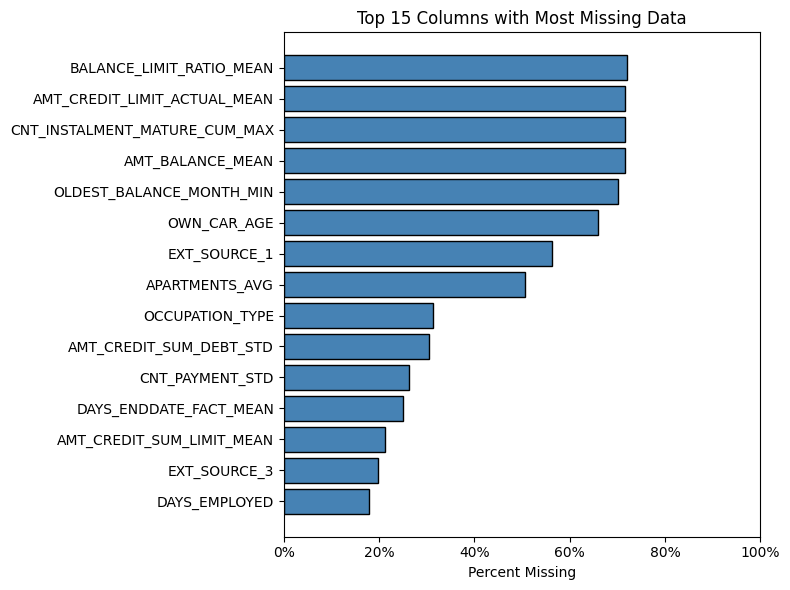

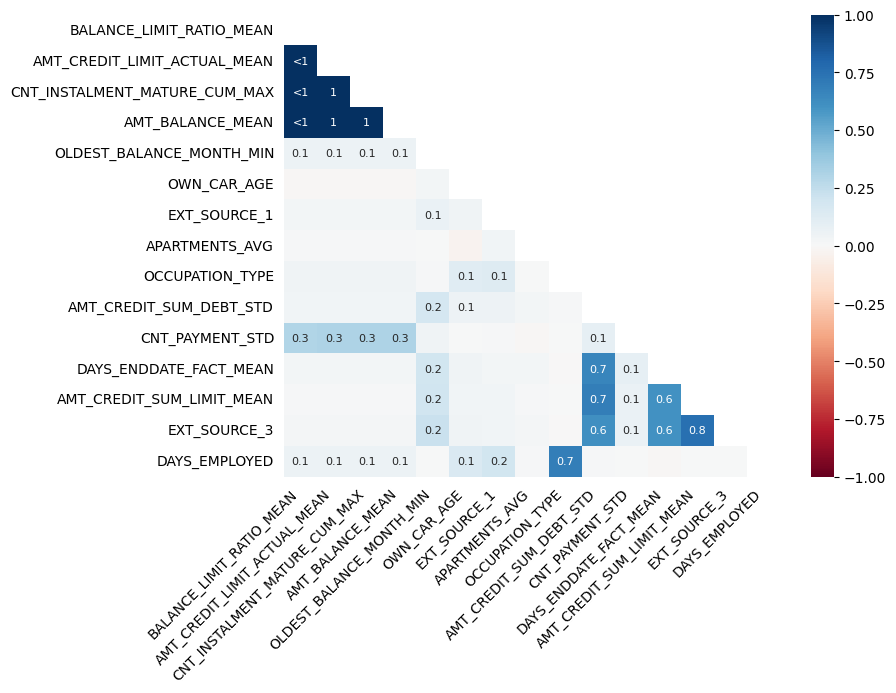

In [4]:
# Missing data from X_train, before imputation
X_train_unimputated = prepare_eda_data(X_train)
show_missing_data(X_train_unimputated, False)

Several features have substancial amounts of missing data, and their patterns of missingness are sometimes correlated. Many of the highly missing-correlated features come from credit_card_balance.csv, suggesting that a large portion of applicants have no associated credit card records.

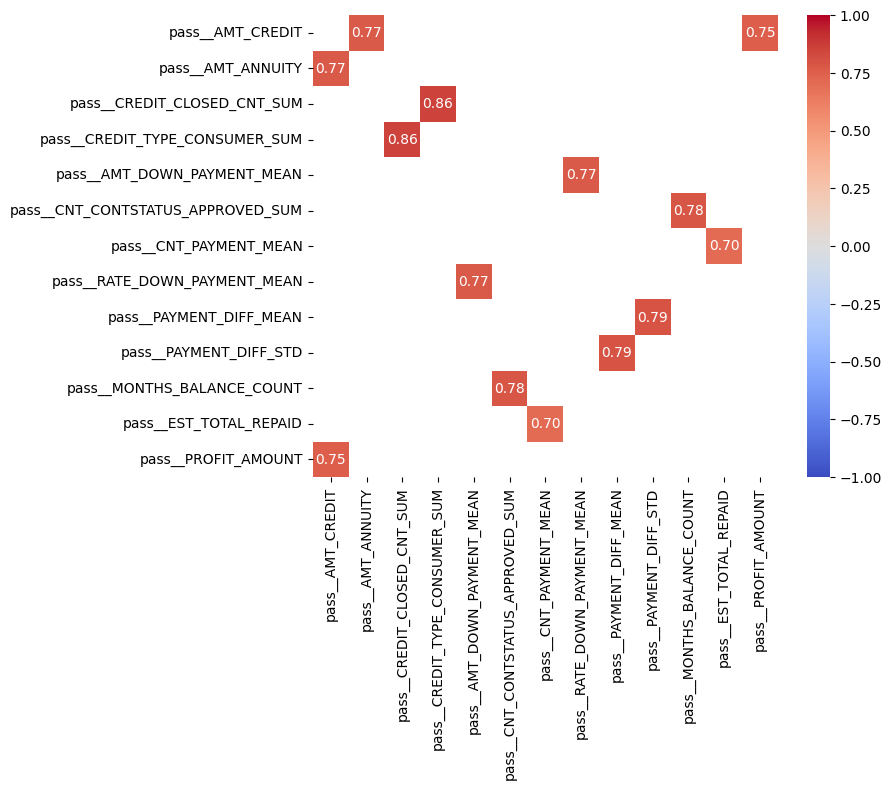

In [5]:
plot_corr(X_train_preprocessed, 0.7)

While many features correlate with others, very few have significant correlation values. The strongest relationship is between `CREDIT_CLOSED_CNT_SUM` and `CREDIT_TYPE_CONSUMER_SUM`. Both of the two variables come from bureau.csv, though they do not derive from the same raw feature.

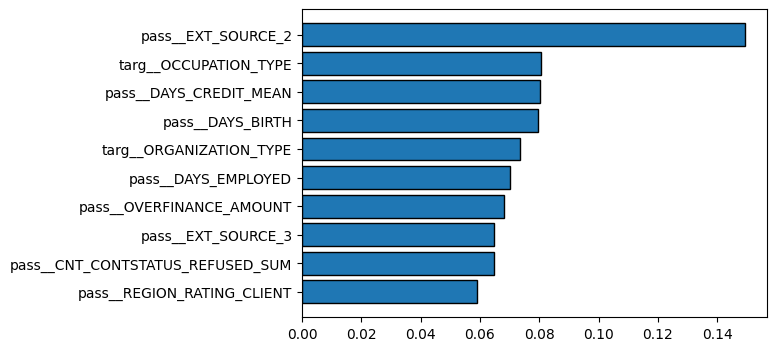

In [ ]:
plot_label_corr(X_train_preprocessed, y_train)

Out of all the processed features, `EXT_SOURCE_2` had the strongest correlation with the label, along with the highest SHAP importance for lightgbm. The remaining features drop off sharply in both correlation and SHAP value, showing how dominant the feature was.

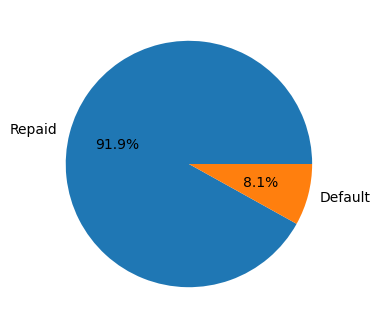

In [7]:
plot_pie(y_train)

For the target label, there is a significant class distribution. With only 8.1% defaulters, naive models are highly incentivized to consistently predict repayment, as it is correct the majority of the time.

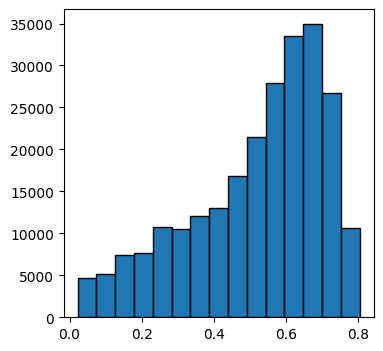

In [ ]:
plot_histogram(X_train_preprocessed, 'pass__EXT_SOURCE_2', bins=15, clip_quantile=(0.01, 0.999))

For lightgbm, `EXT_SOURCE_2` was ranked as the most important feature according to it's SHAP importance. `EXT_SOURCE` 1-3 all were all normalized independant risk assessments from external data sources. In this graph, the data has a significant left-skew, signaling that the external source found the majority of the applicants to have a low risk factor.

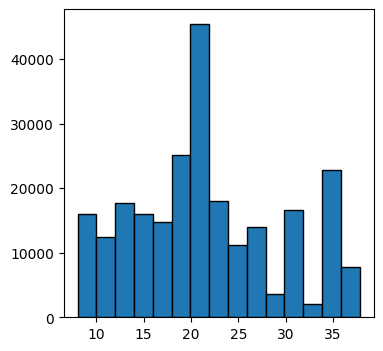

In [16]:
plot_histogram(X_train_preprocessed, 'pass__EXPECTED_TERM', bins=15, clip_quantile=(0, 0.99))

After the `EXT_SOURCE`s, `EXPECTED_TERM` was the 4th highest SHAP importance feature. As it is a synthetic feature, it was calculated from the `AMT_CREDIT` divided by the `AMT_ANNUITY`. This was a proxy feature for the expected duration of the loan. By dividing the principal by the monthly payment, we can see approximately how many months the repayment will take. It's roughly uniformly distributed, with a significant portion of the estimated durations landing on 20 months.

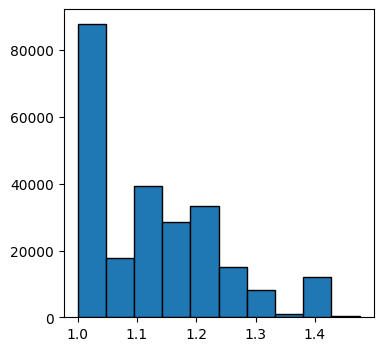

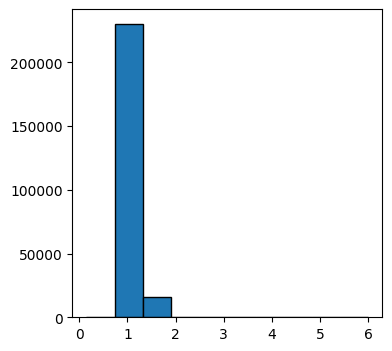

In [26]:
plot_histogram(X_train_preprocessed, 'pass__OVERFINANCE_AMOUNT', bins=10, clip_quantile=(0.01, 0.99))
plot_histogram(X_train_preprocessed, 'pass__OVERFINANCE_AMOUNT', bins=10)

Following close after `EXPECTED_TERM`, `OVERFINANCE_AMOUNT` landed at the 6th highest SHAP importance. Also a synthetic feature, it represents the `AMT_CREDIT` (amount of money being loaned) divided by the `AMT_GOODS_PRICE` (the cost of the actual thing being purchased). A large portion of the values are at or near 1, showing that most people get a loan matching the actual cost of the item. Additionally, outliers range from the loan covering ~25% of the item cost (underfinancing), to the loan being 6x (overfinancing) the item's cost!

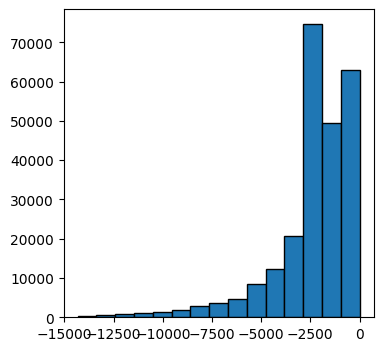

In [29]:
plot_histogram(X_train_preprocessed, 'pass__DAYS_EMPLOYED', bins=15, clip_quantile=(0.001, 1))

`DAYS_EMPLOYED` was the 9th most SHAP important feature. It has a negative scale, where larger negative numbers represent more working days. It has a significant left skew, with the tail ending at outliers around -20,000 days (~54.8 years). Almost all people worked between 0 (never employed) and -5,000 days (~13.7 years). This makes sense, as retirement age is ~60-65, with ~40-45 working years. While the outlier stretches the graph, at the 0.1st percentile, all applicants work under 15,000 days (~41.1 years).

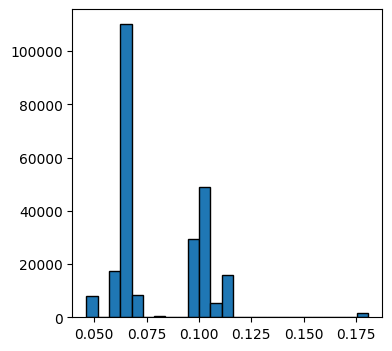

In [31]:
plot_histogram(X_train_preprocessed, 'targ__OCCUPATION_TYPE', bins=25)

As the 10th highest SHAP importance feature, `OCCUPATION_TYPE`, once target encoded, provided meaningful predictive powers. Since the raw feature was target encoded, many of the features stack on specific intervals, due to their shared category. The raw `OCCUPATION_TYPE` had medium cardinality with 18 different values, with 'Laborers' and 'Sales staff' being the top two most common.